In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projects/UFO Sightings/scrubbed.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
df.shape

(80332, 11)

**Printing percentage of null values in each column**

In [4]:
nullVal = df.isnull().sum()
nullPercent = (nullVal / len(df)) * 100

print('Null Values:')
print(round(nullPercent.sort_values(ascending = False), 2))

Null Values:
country                 12.04
state                    7.22
shape                    2.41
comments                 0.02
longitude                0.00
latitude                 0.00
date posted              0.00
duration (hours/min)     0.00
duration (seconds)       0.00
city                     0.00
datetime                 0.00
dtype: float64


Data Wrangling and Tidying Up

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Projects/UFO Sightings/scrubbed.csv', low_memory = False,
                 na_values = ['UNKNOWN', 'UNK'],
                 na_filter = True,
                 skip_blank_lines = True)

In [6]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


Dropping 'duration(hours/min)' column

In [7]:
df.drop(['duration (hours/min)'], inplace = True, axis = 1)

In [8]:
# dropping null values
df = df.dropna(thresh = 8)

# reseting the index
df = df.reset_index(drop = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80257 entries, 0 to 80256
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            80257 non-null  object 
 1   city                80257 non-null  object 
 2   state               74535 non-null  object 
 3   country             70662 non-null  object 
 4   shape               78400 non-null  object 
 5   duration (seconds)  80257 non-null  object 
 6   comments            80244 non-null  object 
 7   date posted         80257 non-null  object 
 8   latitude            80257 non-null  object 
 9   longitude           80257 non-null  float64
dtypes: float64(1), object(9)
memory usage: 6.1+ MB


In [10]:
import datetime as dt

In [11]:
# convert latitude column to numeric data type
df['latitude'] = pd.to_numeric(df['latitude'], errors = 'coerce')

# converting datetime column to datetime data type
df['datetime'] = df.datetime.str.replace('24:00', '00:00')
df['datetime'] = pd.to_datetime(df['datetime'], format = '%m/%d/%Y %H:%M')

In [12]:
df.shape

(80257, 10)

UFO Sighting Frequency

Text(0.5, 1.0, 'UFO Sightings by Year')

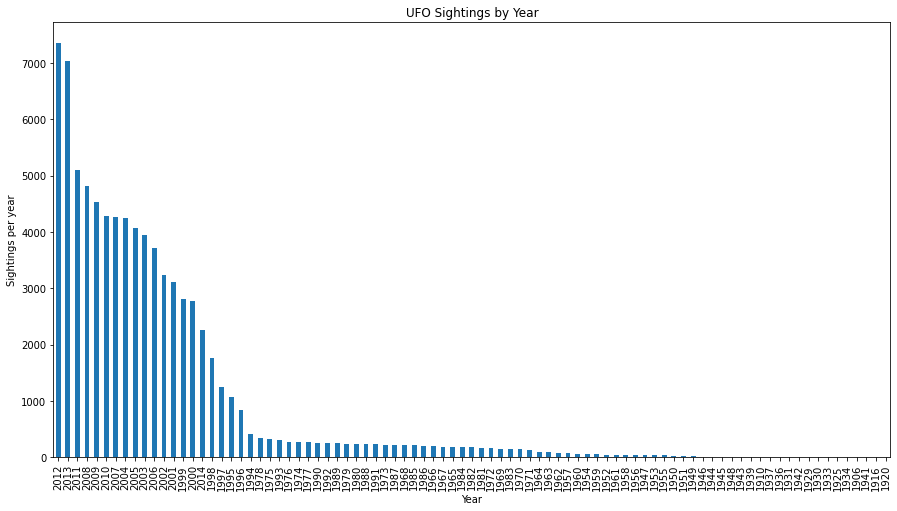

In [13]:
df_year = df['datetime'].dt.year

plt.figure(figsize = (15, 8))
plt.xticks(rotation = 60)
df['datetime'].dt.year.value_counts().plot.bar()
plt.xlabel('Year')
plt.ylabel('Sightings per year')
plt.title('UFO Sightings by Year')

In [14]:
df_year = df['datetime'].dt.year

year_val = pd.DataFrame(df_year.value_counts(), columns = ['Year', 'Sightings Per Year'])
print(year_val)

Empty DataFrame
Columns: [Year, Sightings Per Year]
Index: []


Country Sightings

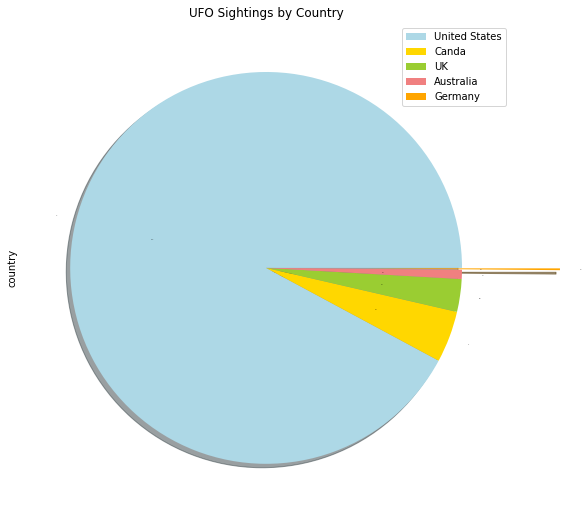

In [15]:
country_sight = df['country'].value_counts()

explode = (0, 0, 0, 0., 0.5)
colors = ['lightblue', 'gold', 'yellowgreen', 'lightcoral', 'orange']
country_sight.plot(kind = 'pie', fontsize = 0, title = 'UFO Sightings by Country', colors = colors, autopct = '%1.1f%%', shadow = True, explode = explode, figsize = (8, 8))
plt.legend(labels = ['United States', 'Canda', 'UK', 'Australia', 'Germany'], loc = 'best')
plt.tight_layout()

We can see that a lot of UFO sightings have happened in USA

UFO Sightings in USA

In [16]:
df_usa = df[df['country'] == 'us']
df_usa.head()

,datetime,city,state,country,shape,duration (seconds),comments,date posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
3,1956-10-10 21:00:00,edna,tx,us,circle,20,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333


Top 10 States:
ca    8912
wa    3966
fl    3835
tx    3447
ny    2980
il    2499
az    2414
pa    2366
oh    2275
mi    1836
Name: state, dtype: int64


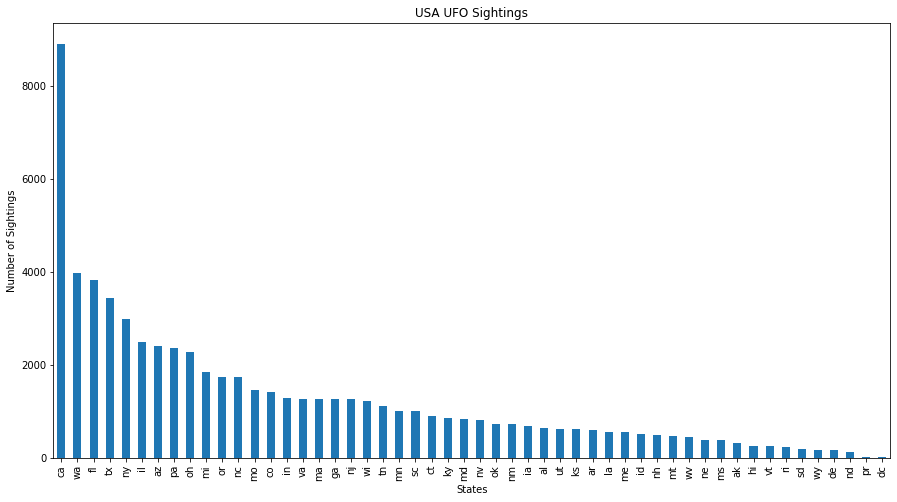

In [17]:
states = df_usa['state'].value_counts()

plt.figure(figsize = (15, 8))
plt.xticks(rotation = 60)
plt.xlabel('States')
plt.ylabel('Number of Sightings')
plt.title('USA UFO Sightings')
df_usa.state.value_counts().plot.bar()

print('Top 10 States:')
print(states[:10].sort_values(ascending = False))

Checking if there is seasonality in the sightings

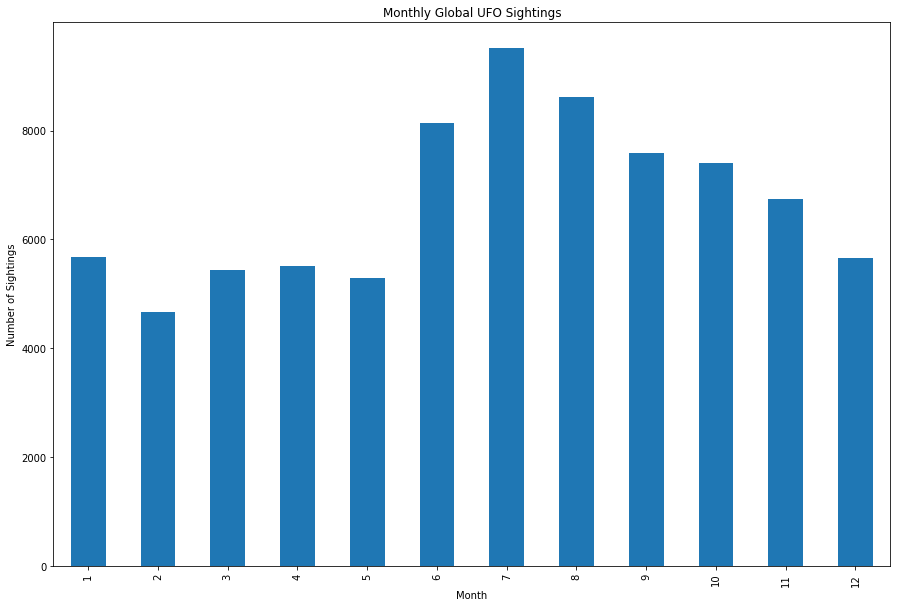

In [18]:
fig, axes = plt.subplots(figsize = (15, 10))

axes.set_title('Monthly Global UFO Sightings')
axes.set_xlabel('Month')
axes.set_ylabel('Number of Sightings')
plt.xticks(rotation = 45)
(df['datetime'].dt.month.value_counts()).sort_index().plot.bar()
plt.show()

In [19]:
# add season column 
df_datem = df['datetime'].dt.month

spring = range(5, 7)
summer = (7, 10)
fall = (10, 12)
seasons = []

for date in df_datem:
  if date in spring:
    seasons.append('Spring')
  elif date in summer:
    seasons.append('Summer')
  elif date in fall:
    seasons.append('Fall')
  else:
    seasons.append('Winter')

In [20]:
# adding seasons column
df['Season'] = pd.Series(seasons, index = df.index)
df.head()

# adding hemisphere column in df dataframe
h = []
for loc in df['latitude']:
  if loc >= 0:
    h.append('Northern Hemisphere')
  else:
    h.append('Southern Hemisphere')

df['Hemisphere'] = (pd.Series(h, index = df.index)).astype('category')

In [21]:
df['Season'].value_counts()

Winter    44255
Summer    16918
Spring    13425
Fall       5659
Name: Season, dtype: int64

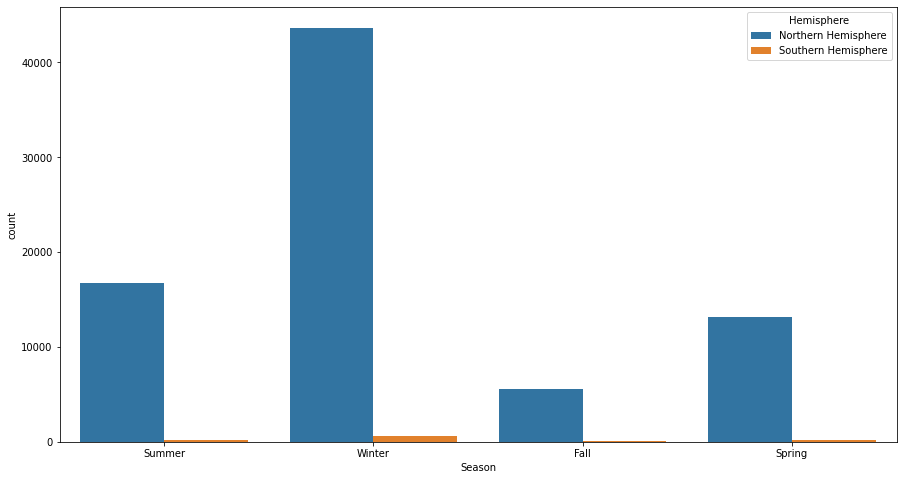

In [22]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'Season', hue = 'Hemisphere', data = df)

In [23]:
df_north = df[df['Hemisphere'] == 'Northern Hemisphere']
df_south = df[df['Hemisphere'] == 'Southern Hemisphere']

In [24]:
# percentage of sightings in norhtern hemisphere
nh = df_north['Season'].value_counts() / len(df_north) * 100
# percentage of sightings in southern hemisphere
sh = df_south['Season'].value_counts() / len (df_south) * 100

In [25]:
print(nh,'\n')
print(sh)

Winter    55.144412
Summer    21.175000
Spring    16.667719
Fall       7.012869
Name: Season, dtype: float64 

Winter    54.934823
Spring    21.135940
Summer    14.059590
Fall       9.869646
Name: Season, dtype: float64


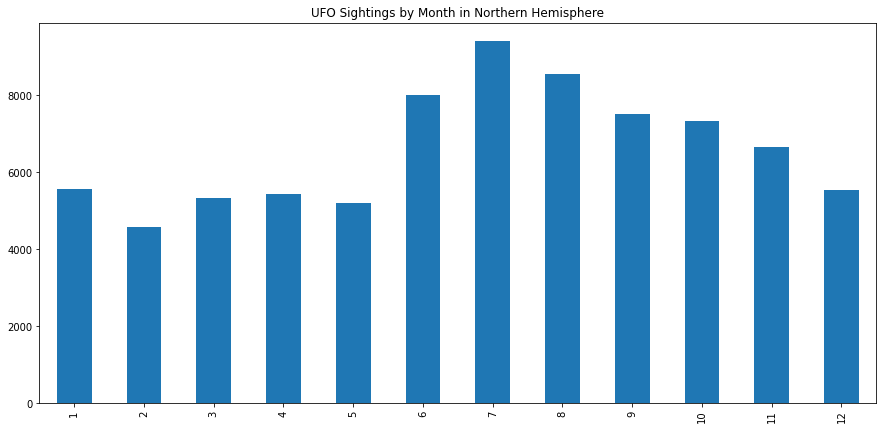

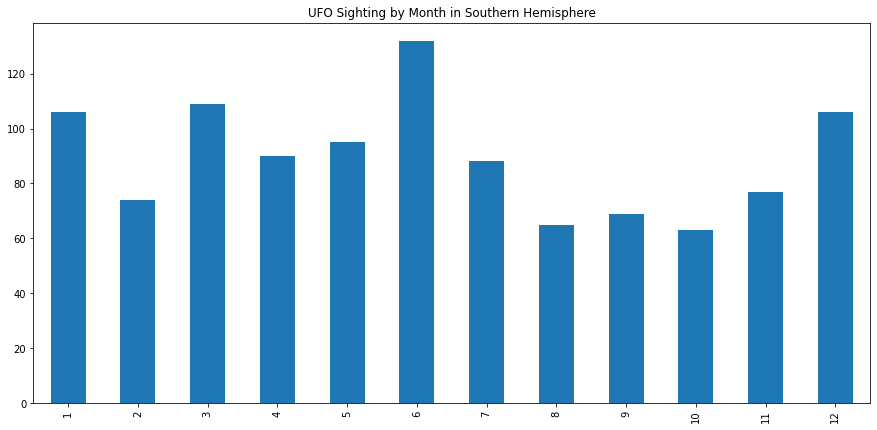

In [26]:
plt.figure(figsize = (15,7))
plt.xticks(rotation = 60)
plt.title('UFO Sightings by Month in Northern Hemisphere')
(df_north['datetime'].dt.month.value_counts()).sort_index().plot.bar()
plt.show()

plt.figure(figsize = (15,7))
plt.xticks(rotation = 60)
plt.title('UFO Sighting by Month in Southern Hemisphere')
(df_south['datetime'].dt.month.value_counts()).sort_index().plot.bar()
plt.show()

In [27]:
df_north_month = df_north['datetime'].dt.month
print('Top Months for UFO Sightings in N. Hemishpere:')
print(df_north_month.value_counts()[:6])

df_south_month = df_south['datetime'].dt.month
print('Top Months for UFO Sightings in S. Hemisphere:')
print(df_south_month.value_counts()[:6])

Top Months for UFO Sightings in N. Hemishpere:
7     9424
8     8562
6     8004
9     7511
10    7343
11    6659
Name: datetime, dtype: int64
Top Months for UFO Sightings in S. Hemisphere:
6     132
3     109
12    106
1     106
5      95
4      90
Name: datetime, dtype: int64


Most Used Words

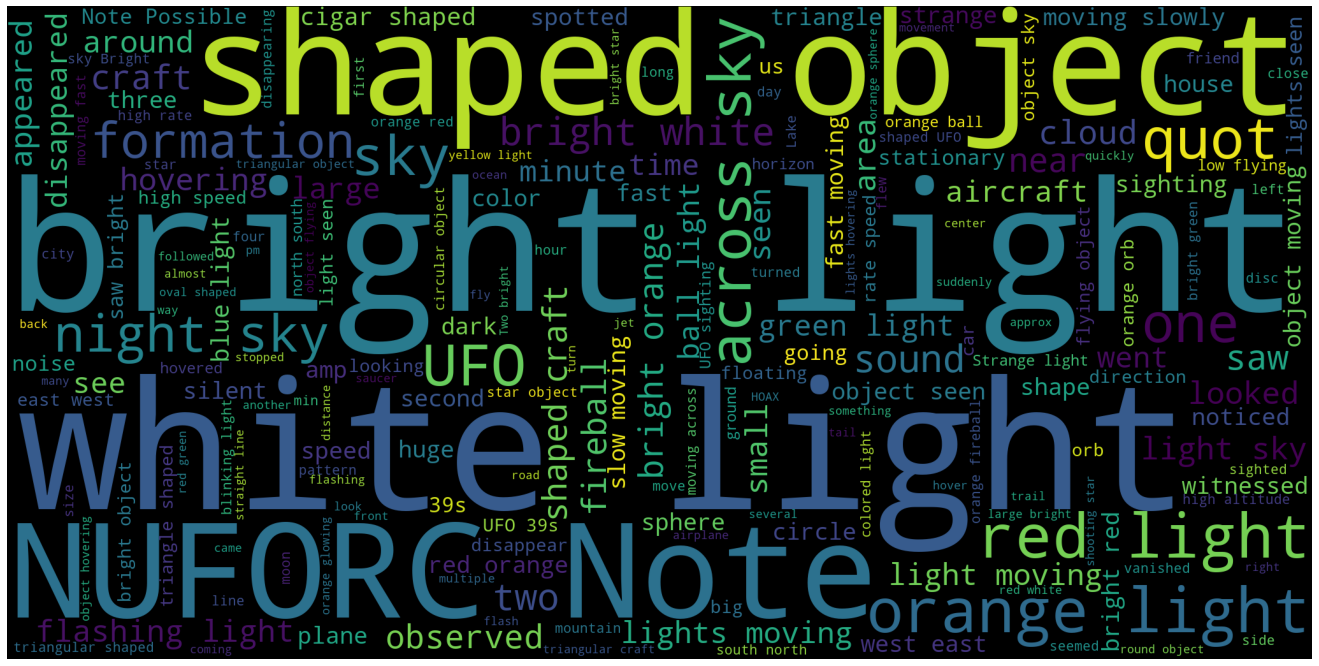

In [28]:
from wordcloud import WordCloud

words = [i for i in df.comments.dropna()]
words = ' '.join(words)

plt.subplots(figsize = (28, 12))
wordcloud = WordCloud(
    background_color = 'black',
    width = 2048,
    height = 1024
).generate(words)

plt.imshow(wordcloud)
plt.axis('off')

plt.show()